<a href="https://colab.research.google.com/github/Serahverg-8/Deep-Learning-pytorch/blob/main/Pytorch_2_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
#nn building blocks of neural nets
import matplotlib.pyplot as plt


1. get Data ready
2. turn into tensors
3. build or choose training model --- > loss function and optimizer
4.fit model to make prediction
5.Evaluate the model
6.Improve the model - iteration
7. save model

#Getting data reading(turning it into tensors)

In [2]:
#creating data - linear regression. (known parameters set by us)
#only one feature
weight = 0.7
bias = 0.3


#create
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
#usually we work with 2d so each row is one input 50 X 1 . so add 1 to dim 1

X.shape

torch.Size([50, 1])

In [3]:
X


tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [4]:
y = X.mul(weight) + bias

In [5]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

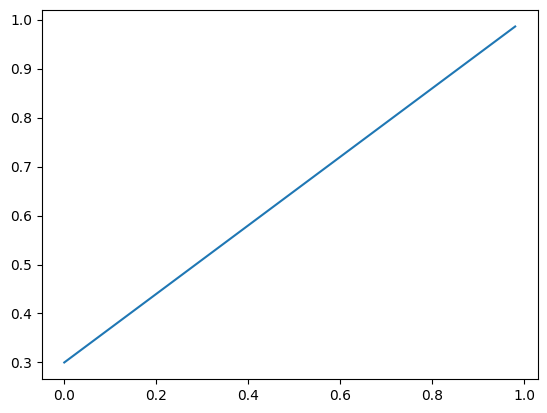

In [6]:
plt.plot(X,y)

Split into train and test

We do this for genaralization ( course material, practice test,  final exam)

In [7]:
train_split = int(0.8 * len(X))

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

In [8]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

torch.Size([40, 1]) torch.Size([40, 1]) torch.Size([10, 1]) torch.Size([10, 1])


In [9]:
#Visualization functions



In [10]:
def visualize(X_train,y_train,X_test,y_test,predictions=None):
  plt.figure(figsize=(10,5))
  plt.scatter(X_train,y_train,c="blue",s=4,label="Training Data")
  plt.scatter(X_test,y_test,c="red",s=4,label="Test Data")
  if predictions is not  None:
      plt.scatter(X_test,predictions,c="black",s=3,label="Predicted")
  plt.legend()
  plt.plot()

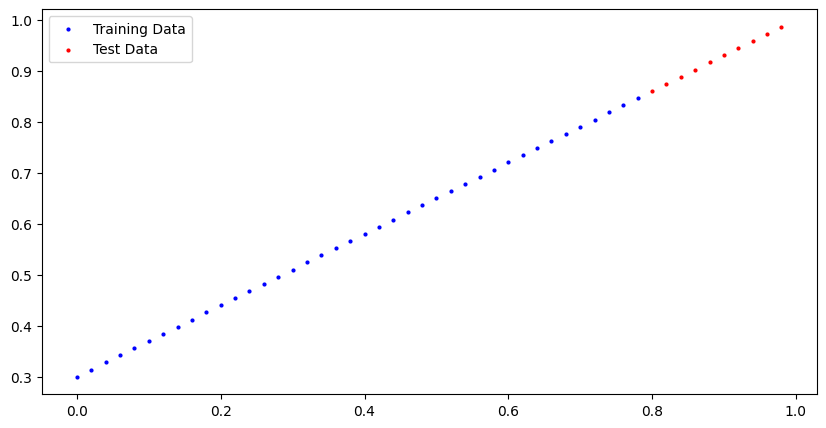

In [11]:
visualize(X_train,y_train,X_test,y_test)

#Building Model

####read about torch.nn.module.
PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are torch.nn, torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader. For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

PyTorch module	What does it do?  

**torch.nn**	  
Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).  

**torch.nn.Parameter**:-  

Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".



**torch.nn.Module**:-
The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.  

**torch.optim**:-  
Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).  

**def forward()**:-  
All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).
  
If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from torch.nn,

nn.Module - contains the larger building blocks (layers).

nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s)).

forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s).

torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data.


In [12]:
#nn.module has almost everything that builds pytorch

#In the documentation It is said that the models we build shuouls also subclass nn.models. So nn.models is the superclass here.



class Lin_reg(nn.Module):
  def __init__(self):
    super().__init__()
    #initial

    # we have only one parameter

    #weigths
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True))

    #nn.parameter is a tensor itself .when assigned with modules , they act as attribute parameter.
    #bias
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True))


    #Forward method is to define the computation in the model
    #input and returns type torch.Trnsor
  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights*x + self.bias

    # so far Our model will take the random weight and the random bias and plug it into the linear regression model equation.

    #Next we need to check the error. Hence we need to optimize. torch.optim


Lets check our models parameters now

In [13]:
torch.manual_seed(42)

model_0= Lin_reg()

In [14]:
model_0.parameters()

<generator object Module.parameters at 0x7de8a1f87c30>

In [15]:
list(model_0.parameters()) #--- > these are the parameters we have set

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
#actual values :

print(weight,bias)

0.7 0.3


In [18]:
#we need to get as close to these values


To make the predictions  ---->   we use torch.inference_mode()


In [19]:
with torch.inference_mode():
  y_predicted=model_0(X_test)

y_predicted[:10]

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

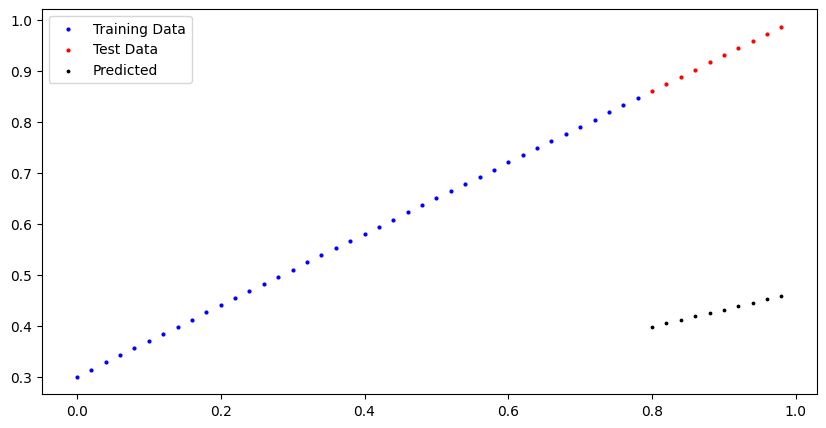

In [20]:
visualize(X_train,y_train,X_test,y_test,y_predicted)

so off!!



Note: in older PyTorch code you might also see torch.no_grad().

```
with torch.no_grad():
y_preds = model_0(X_test)
```

    

#Train Model

WE use loss functions to optimize. Used to measure how wrong our models are from he real values. from torch.nn. It is also called cost function

Use any from torch.nn loss functions

https://pytorch.org/docs/stable/nn.html#loss-functions

Lets use L1 loss which is the Mean absolue error

In [21]:
#set up a loss function using nn.L1loss

loss_function = nn.L1Loss()

In [23]:
#set an optimizer

#torch.optim --- > has many different optimizers.


#eg Adam SDG(stichastic gradient descent) etc  (try and see which works best)

https://pytorch.org/docs/stable/optim.html

In [28]:
  optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

  #learning rate tell the step value +oer - 0.01 in this case

params:-   
 is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).  

lr : -   
is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).


## #Building the training loop

In [29]:
epochs = 1

#one time through all the data#hyper parameters because we set them



In [ ]:
for epochs in range(epochs):


  model_0.train()  # sets all the parameters in the model that require gradient tracking to true.This turns on gradient tracking for the model-building
  #step 1: forward pass  - train

  y_pred=model_0(X_train)

  #step 2: calculate the loss:

  loss = loss_function(X_train,y_train)

  #step 3 : Optimize zero grad: Sets the gradients of all optimized torch.Tensor s to zero. Every epoch the gradients are stored and accumulated. clear them

  optimizer.zero_grad()

  #step 4. Perform backpropagation on the loss
  loss.backward()

  #step 5 : perform gradient descent
  optimizer.step()

  model_0.eval() # turns off the gradient tracking
